# Energía cinética de traslación

[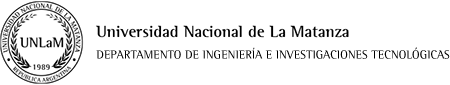](https://ingenieria.unlam.edu.ar/)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Definición
La energía cinética de una partícula puntual de masa $m$ es 
$$
T= \frac{m}{2} \left(\dot{\vec{r}}\right)^2 = \frac{m}{2} \left(\dot{\vec{r}} \cdot \dot{\vec{r}}\right) = \frac{m}{2} \left(\dot{r_i}^2+ \dot{r_j}^2+ \dot{r_k}^2 \right), 
$$
función de las coordenadas en la tríada de versores $\hat{i}, \hat{j}, \hat{k}$.

Esto para un sistema de coordenadas cartesianas es
$$
T= \frac{m}{2} \left(\dot{x}^2+ \dot{y}^2+ \dot{z}^2 \right) .
$$

## ¿Cómo calcularemos $T$ en esta asignatura?
Escribiremos código para resolver cada ejercicio. La implementación de Python dentro de Jupyter hará que operemos con él como un lenguaje interpretado. Esto resulta en que podemos ejecutar parte de un programa, revisar y modificar variables y ejecutar nuevamente esta u hacer lo propio con otras partes.

Esto es diametralmente opuesto a lo que ocurre en un lenguaje compilado, como C/C++, donde hay que escribir todo el código para ver resultados.
Aprovecharemos esta característica para ir construyendo el código de a partes, revisando resultados parciales.

Lo primero que vamos a ejecutar en una sesión es el _importar_ las bibliotecas de funciones para mecánica, la parte de la física que nos ocupa en esta asignatura. 

In [13]:
import sympy as sm # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as me # de sympy utilizaremos funciones de mecánica
me.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

Definimos el símbolo para una partícula puntual de masa $m_1$.

In [14]:
m1 = sm.symbols('m_1', positive=True) # las masas son siempre positivas

Tal partícula debe ubicarse en el espacio. Para esto definimos un marco de referencias en coordenadas cartesianas.

In [15]:
e = me.ReferenceFrame('e') # marco referencial o en coordenadas cartesianas

En este caso se desplazará en el eje $x$ de este sistema de coordenadas, $\hat{e}_x$, por lo que es necesario definir su coordenada en tal eje $x_1$.

In [16]:
x_1 = me.dynamicsymbols('x_1') # x cambiara con el tiempo, por tanto es una variable dinámica

Con todo lo anterior puede definirse la posición de esta partícula.
<!--
$$
\begin{aligned}
\vec{r}_1 
&= x_1 \hat{e}_x.
\end{aligned}
$$
-->

In [17]:
partícula1_r = x_1 * e.x
partícula1_r

[Python](https://www.python.org/), como cualquier otro lenguaje de programación es capaz hacer cuentas como una calculadora.
Esto se llama cálculo numérico.
En contrapartida, la biblioteca [SymPy](https://www.sympy.org/en/index.html) permite operar en forma simbólica habilitando resolver cuestiones de análisis y álgebra.
Por ejemplo permite derivar en función del tiempo la posición de la partícula de masa $m_1$
<!--
$$
\dot{\vec{r}}_1 = \dot{x} \hat{x}
$$
-->

In [18]:
partícula1_v = partícula1_r.dt(e) # deriva respecto a t en el sistema de referencia e
partícula1_v

Es necesario calcular el cuadrado de esta velocidad para escribir
$$
T = \dfrac{m}{2} \left(\dot{\vec{r}}\right)^2
$$.
Como las velocidades son vectores es práctico para esto usar el producto escalar, llamado también producto punto (_dot_ en inglés)
$$
\left( \dot{\vec{r}} \right)^2 = \dot{\vec{r}} \cdot \dot{\vec{r}} .
$$

In [19]:
partícula1_v.dot(partícula1_v)

Con todo esto tenemos todo lo necesario para escribir la energía cinética de traslación de la partícula de masa m1.

In [20]:
# Energía cinética
unMedio = sm.Rational(1,2) # Rational: fracción de enteros
partícula1_T = unMedio * m1 * partícula1_v.dot(partícula1_v)
partícula1_T

### Sistema de N partículas

Para obtener la $T$ de un sistema hay $N$ partículas se suman todas sus $T$. E.g. para un sistema con dos partículas
$$
T = \sum_{i=1}^{N=2} \frac{m_i}{2} \left( \dot{\vec{r}}_i \right)^2 = \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 .
$$

Si, como en el ejemplo anterior las partículas están confinadas al eje $x$ de un sistema de coordenadas cartesianas, la $T$ se simplifica a
$$
T = \frac{m_1}{2} \left( \dot{x}_1 \right)^2 + \frac{m_2}{2} \left( \dot{x}_2 \right)^2 .
$$

Para esto necesitamos definir varios símbolos, $m_1$ y $m_2$, además de múltiples coordenadas, $x_1$ y $x_2$.

En caso de que deseemos definir más de una variable dinámica basta sumarla directamente en la línea anterior.
Por ejemplo, podemos definir $x_1$ y $x_2$ por medio de  
`x1, x2 = me.dynamicsymbols('x_1, x_2')`

In [21]:
# Parámetros físicos del sistema, i.e. las masas
m1, m2 = sm.symbols('m_1, m_2', positive=True) # las masas son siempre positivas

En este caso llamamos al marco de referencia "N", sin embargo, podemos utilizar cualquier notación que nos resulte cómoda, por ejemplo:
`e = me.ReferenceFrame('e')`
en este caso entonces utilizaríamos la notación `x1 * e.x` para indicar $x_1 \hat{e}_x$

In [22]:
# Posiciones
e = me.ReferenceFrame('e')
x1, x2 = me.dynamicsymbols('x_1, x_2')
partícula1_r = x1 * e.x # m1_r : para la masa 1 su posición r
partícula2_r = x2 * e.x 

# Velocidades
partícula1_v = partícula1_r.dt(e)
partícula2_v = partícula2_r.dt(e)

In [23]:
# Energía cinética partícula 1
partícula1_T =  unMedio * m1 * partícula1_v.dot(partícula1_v) # un medio de la masa por la velocidad al cuadrado
partícula1_T

In [24]:
# Energía cinética partícula 2
partícula2_T = unMedio * m2 * partícula2_v.dot(partícula2_v)
partícula2_T

Se termina reiterando la escritura de líneas de código idénticas, lo que puede evitarse en cualquier lenguaje de programación.
Más adelante se retoma tal idea, pero de momento se suman las energías cinéticas de las partículas.

In [38]:
# Energía cinética del sistema
sistema_T = partícula1_T + partícula2_T
sistema_T

Con todo lo visto se pueden resolver los problemas que figuran en la guía de ejercicios. 

Como referencia resolveremos a continuación uno de estos.

## Un ejercicio hecho desde el principio | Péndulo con punto de suspensión libre

> Bibliografía:
>- Sección 5 ($\S 5$) Ejercicio 2  
Mecánica  
Lev Davidovich Landau, y E. M. Lifshitz  
Reverté, 1994

### Enunciado

Péndulo plano de masa $m_2$, cuyo punto de suspensión (de masa $m_1$) puede desplazarse en el mismo plano sobre una recta horizontal.

La cuerda que une las partículas de masas $m_1$ y $m_2$ se considera rígida (no se dobla) y, por tanto, mantiene una distancia constante de $
\ell$ entre ambas.

Escriba la energía cinética, $T$ en función de las coordenadas indicadas por la figura: $x, \phi$.

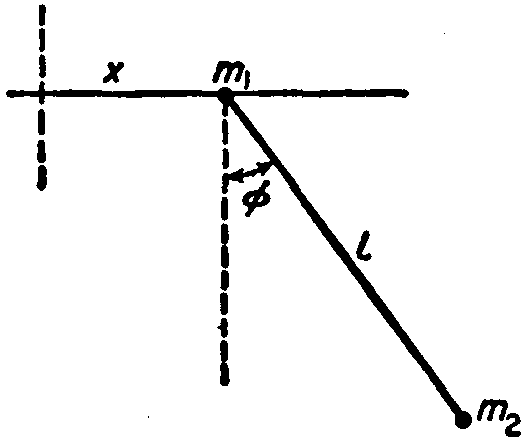

### Posiciones

Se importan las bibliotecas de funciones a agregar a las básicas de Python.

In [ ]:
# Importar funciones de mecánica de SymPy.
import sympy as sm # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as me # de sympy utilizaremos funciones de mecánica
me.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

Establecemos un sistema de referencia.

In [ ]:
# Establece sistema de referencia
e = me.ReferenceFrame('e') # marco referencial o en coordenadas cartesianas

La posición para la partícula de masa $m_1$, esto es $\vec{r}_1$

In [ ]:
# posición de primer partícula
x = me.dynamicsymbols('x') # x cambiara con el tiempo, por tanto es una variable dinámica
partícula1_r = x * e.x # posición de la partícula de masa m1
partícula1_r

La partícula de masa $m_2$ mantiene siempre una separación de $\ell$ respecto a la de $m_1$.
Su posición se define a partir de esta.
Solo hay que hacer la proyección en el sistema de referencia en función de la coordenada $\phi$,
$$
\begin{aligned}
\vec{r}_2 
&= \vec{r}_1 + \ell \left( \sin{(\phi)} \hat{x} +  \cos{(\phi)} (- \hat{y}) \right) \\
&= \left( \ell \sin{(\phi)} + x \right) \hat{x} -\ell \cos{(\phi)}  \hat{y}.
\end{aligned}
$$

Describir las posiciones en función de la geometría es el **procedimiento central** para la resolución de este problema. 

La longitud del péndulo $\ell$ es una característica del sistema que **no varía** con el transcurrir del tiempo.
Lo mismo sucede con las masas de las partículas.
**No son variables** por lo que no tiene sentido declararles como tales, pero son **símbolos** con los que el código debe ser capaz de operar.

In [27]:
# Defino los parámetros físicos del sistema
m1, m2, l = sm.symbols(r'm_1, m_2, \ell', positive=True) # Escribirlos tras el subguión hace que los números aparezcan como subíndices. 

Declarar $\phi$ como variable y hacer uso de las funciones trigonométricas de SymPy permite escribir la posición de la partícula de masa $m_2$.

In [28]:
# posición de la segunda partícula
phi = me.dynamicsymbols('phi')
partícula2_r = partícula1_r + l * ( sm.sin(phi) * e.x + sm.cos(phi) * (-e.y) )  # y versor apunta hacia arriba
partícula2_r

### Velocidades
Derivar la posición en función del tiempo la posición de la partícula de masa $m_1$ para obtener su velocidad
$$
\dot{\vec{r}}_1 = \dot{x} \hat{x}
$$

In [29]:
partícula1_v = partícula1_r.dt(e) # deriva respecto a t en el sistema de referencia e
partícula1_v

es un ejercicio trivial.

Pero la posición de la otra partícula

In [30]:
partícula2_r

tiene una expresión más compleja por lo que derivarle implica aplica recordar derivadas de funciones trigonométricas y el aplicar la regla de la cadena.
$$
\dot{\vec{r}}_2 = \left( \ell \cos{(\phi)} \dot{\phi} + \dot{x} \right) \hat{x} + \ell \sin{(\phi)} \dot{\phi}  \hat{y} ,
$$

Sympy aplica correctamente la regla de la cadena en las funciones trigonométricas.

In [31]:
partícula2_v = partícula2_r.dt(e)
partícula2_v

### Energía cinética de traslación
La energía cinética de una partícula de masa $m$ es 
$$
T= \frac{m}{2} \left(\dot{\vec{r}}\right)^2 = \frac{m}{2} \left(\dot{\vec{r}} \cdot \dot{\vec{r}}\right) = \frac{m}{2} \left(\dot{r_i}^2+ \dot{r_j}^2+ \dot{r_k}^2 \right) .
$$

En este ejercicio en que se hizo uso de las cartesianas esto es $T= \frac{m}{2} \left(\dot{x}^2+ \dot{y}^2+ \dot{z}^2 \right)$.

Lo que hay que obtener es la $T$ del sistema.
En este, en que hay dos partículas, deben adicionarse las de ambas,
$$
T = \sum_{i=1}^{P=2} \frac{m_i}{2} \left( \dot{\vec{r}}_i \right)^2 = \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 .
$$

Por tanto, hay que obtener de las velocidades $\vec{r}_i$ su valor al cuadrado.
Para la primera partícula
$$
\left(\dot{\vec{r}}_1 \right)^2 = \dot{\vec{r}}_1 \cdot \dot{\vec{r}}_1 = \dot{x}^2
$$

In [32]:
# velocidades al cuadrado es decir producto punto con si mismo
partícula1_v_cuadrado = partícula1_v.dot(partícula1_v)
partícula1_v_cuadrado

Pero para la segunda es un poco más laborioso
$$
\begin{aligned}
\left(\dot{\vec{r}}_2 \right)^2= \dot{\vec{r}}_2 \cdot \dot{\vec{r}}_2 
&= \left( \dot{x} + \ell \cos{\phi} \dot{\phi} \right)^2 + \left( \ell \sin{\phi} \dot{\phi} \right)^2 \\
&= \left( \dot{x}^2 + 2 \dot{x} \ell \cos{\phi} \dot{\phi} + \ell^2 \cos^2{\phi} \dot{\phi}^2 \right) + \left( \ell^2 \sin^2{\phi} \dot{\phi}^2 \right) \\
&= \dot{x}^2 + 2 \dot{x} \ell \cos{\phi} \dot{\phi} + \ell^2 \dot{\phi}^2 . 
\end{aligned}
$$

In [33]:
partícula2_v_cuadrado = partícula2_v.dot(partícula2_v)
partícula2_v_cuadrado

Esta última expresión puede hacerse más clara expandiendo el cuadrado de lo que está en paréntesis y aprovechando la identidad de la suma del cuadrado de senos y cosenos. 

In [34]:
partícula2_v_cuadrado.simplify()

Con esto la energía cinética queda
$$
\begin{aligned}
T(\dot{x}_1, \phi, \dot{\phi}) &= \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 \\
& = \frac{m_1}{2} \dot{x}^2 + \frac{m_2}{2} \left( \dot{x}^2 + 2 \dot{x} \ell \cos{\phi} \dot{\phi} + l^2 \dot{\phi}^2 \right) \\
\end{aligned}
$$

In [35]:
# Energía cinética partícula 1
partícula1_T = unMedio * m1 * partícula1_v.dot(partícula1_v) # un medio de la masa por la velocidad al cuadrado

In [36]:
# Energía cinética partícula 2
partícula2_T = unMedio * m2 * partícula2_v.dot(partícula2_v)

In [ ]:
# Energía cinética del sistema
sistema_T = (partícula1_T + partícula2_T).simplify()
sistema_T

Como puede verse el mayor esfuerzo que insume la resolución del problema es describir la posición de las partículas en función de la geometría del sistema.

### La ley del menor esfuerzo: programar para trabajar menos

Hay **dos partículas** en el sistema.
Se escribió **dos veces** los mismos comandos para calcular sus velocidades, sus cuadros y con estos sus energías cinéticas.
Una repetición innecesaria, puesto que se tiene a disposición un lenguaje de programación general como Python.

Basta **definir una función** que calcule la energía cinética indicando en ella:
- entradas: masa $m$ y posición de la partícula $\vec{r}$ en un determinado marco de referencia 
- procesos intermedios que deba hacer a partir de las entradas para calcular la energía cinética como $\frac{m}{2} \dot{r}^2$
- salida: lo que **retornará**, que se escribe tras la sentencia 
```Python
return
```

La celda inferior contiene el código que define la función `energíaCinéticaTraslación`.
Entre triples comillas dobles se puede incluir un comentario para explicar que hace la función definida.

In [40]:
def energíaCinéticaTraslación(masa, posición, marcoDeReferencia):
    r"""
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot \dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    T_traslación = (unMedio * masa * velocidad.dot(velocidad)).simplify()
    return T_traslación

Así para la partícula de masa `m1` cuya posición es `m1_r` en el marco de referencia `e` se obtiene que 

In [44]:
partícula1_T = energíaCinéticaTraslación(m1, partícula1_r, e)

Lo mismo para la partícula de masa `m2`.

In [42]:
partícula2_T = energíaCinéticaTraslación(m2, partícula2_r, e)

Luego basta sumar estos resultados parciales.

In [43]:
# Energía cinética del sistema
sistema_T = (partícula1_T + partícula2_T).simplify()
sistema_T